<a href="https://colab.research.google.com/github/mansine/Electricity-Consumption/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN,LSTM,GRU
from sklearn.preprocessing import MinMaxScaler
import keras
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#reading the dataset
df=pd.read_csv("/content/File1.txt",header = None,delimiter = ' ')

In [ ]:
#adding columns in the data
df.columns = ['MeterID','DateTime','ElectricityConsumption']

In [ ]:
#checking the range of DateTime column
df['DateTime'].min() , df['DateTime'].max()

(19501, 73048)

In [ ]:
#Keep the DataFrame with valid entries in the same variable.

df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24465838 entries, 0 to 24465837
Data columns (total 3 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   MeterID                 int64  
 1   DateTime                int64  
 2   ElectricityConsumption  float64
dtypes: float64(1), int64(2)
memory usage: 746.6 MB


In [ ]:
#seperating days and time from 5 digits DateTime columns
#Converting DateTime datatype from integer to string
df['DateTime'] = df['DateTime'].astype('str')
new = df['DateTime'].str.split("", n =0, expand = True)
#First 2digits are days in 2year readings
df['date'] = new[1] + new[2] + new[3] 
#Last 2digits showing time code
df['time_in_minutes'] = new[4] + new[5]

In [ ]:
#No more need of duplicated data
df.drop('DateTime', axis=1, inplace=True)

In [ ]:
#convert string to integer
df['date'] = df['date'].astype(int)
df['time_in_minutes'] = df['time_in_minutes'].astype(int)

In [ ]:
# convert the mins to real time by multiplying it by 30 mins
df['time_in_minutes']=df['time_in_minutes']*30

In [ ]:
df.isnull().sum()

MeterID                   0
ElectricityConsumption    0
date                      0
time_in_minutes           0
dtype: int64

In [ ]:
#sorting the value in ascending order by MererID,date and time_in_minutes
df.sort_values(['MeterID','date','time_in_minutes'],ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
#kilowatt consumption per day is aggregated
df=df.groupby(['date']).agg('mean')

In [ ]:
# Drop unwanted attributes
df.drop('time_in_minutes', axis=1, inplace=True)
df.drop('MeterID', axis=1, inplace=True)



In [ ]:
#NEW DATA
df.to_csv(r'data.csv')

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(df, look_back=1):	
   dataX, dataY = [], []
   for i in range(len(df)-look_back-1):
		  a = df[i:(i+look_back), 0]
		  dataX.append(a)
		  dataY.append(df[i + look_back, 0])
   return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = df['ElectricityConsumption'].values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset=dataset.reshape(-1,1)
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

opt = keras.optimizers.Adam(learning_rate=0.0001)

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=opt)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)




Epoch 1/100
426/426 [==============================] - 2s 3ms/step - loss: 0.1484
Epoch 2/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0574
Epoch 3/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0292
Epoch 4/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0247
Epoch 5/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0195
Epoch 6/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0146
Epoch 7/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0131
Epoch 8/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0101
Epoch 9/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0079
Epoch 10/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0064
Epoch 11/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0060
Epoch 12/100
426/426 [==============================] - 1s 3ms/step - loss: 0.0057
Epoch 13/100


In [ ]:
train

array([[0.22250557],
       [0.17870104],
       [0.16751873],
       [0.17819285],
       [0.11040294],
       [0.05150759],
       [0.18094945],
       [0.22085428],
       [0.1982789 ],
       [0.18844068],
       [0.17012286],
       [0.1272763 ],
       [0.06516421],
       [0.1862396 ],
       [0.24202466],
       [0.22619951],
       [0.19950819],
       [0.25433838],
       [0.11615038],
       [0.06670928],
       [0.08443916],
       [0.20455849],
       [0.21624899],
       [0.19282651],
       [0.16752875],
       [0.08905947],
       [0.07555962],
       [0.1993661 ],
       [0.2187221 ],
       [0.20495427],
       [0.19176757],
       [0.23642707],
       [0.14341557],
       [0.1030525 ],
       [0.20482457],
       [0.25219262],
       [0.2689432 ],
       [0.24190283],
       [0.22505617],
       [0.14086914],
       [0.12444758],
       [0.23054218],
       [0.25131345],
       [0.25226343],
       [0.24188936],
       [0.22341573],
       [0.13980436],
       [0.150

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 0.03 RMSE
Test Score: 0.03 RMSE


In [ ]:
trainY[0]

array([0.61205897, 0.60655823, 0.61180898, 0.57846219, 0.54949075,
       0.61316499, 0.63279473, 0.62168959, 0.61685003, 0.60783924,
       0.58676243, 0.55620863, 0.61576729, 0.64320873, 0.63542412,
       0.62229429, 0.64926602, 0.58128943, 0.55696867, 0.56569024,
       0.6247786 , 0.63052932, 0.61900748, 0.60656316, 0.56796304,
       0.56132227, 0.62222439, 0.63174588, 0.62497329, 0.61848657,
       0.64045519, 0.59470156, 0.5748464 , 0.62490949, 0.64821049,
       0.65645032, 0.6431488 , 0.63486169, 0.59344893, 0.58537094,
       0.63756034, 0.64777801, 0.64824532, 0.64314217, 0.63405474,
       0.59292515, 0.5983218 , 0.67047454, 0.65511226, 0.6769802 ,
       0.65210845, 0.63502712, 0.61053865, 0.60818815, 0.63919061,
       0.66341015, 0.63949853, 0.63092544, 0.61979332, 0.59753947,
       0.57993407, 0.64909678, 0.65110124, 0.64930718, 0.63985612,
       0.64202823, 0.62589676, 0.61076852, 0.66561944, 0.66175825,
       0.65728502, 0.66057523, 0.64445044, 0.62996965, 0.61853

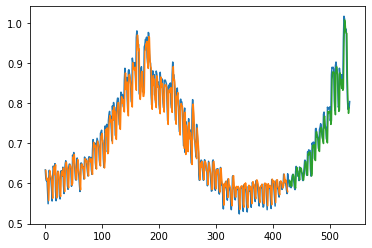

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
test


array([[0.16665626],
       [0.13759327],
       [0.14146435],
       [0.16296208],
       [0.13250852],
       [0.17146277],
       [0.19336998],
       [0.20026767],
       [0.18930924],
       [0.15722358],
       [0.13117647],
       [0.12267804],
       [0.21533728],
       [0.24050367],
       [0.21906137],
       [0.21892226],
       [0.19094193],
       [0.20164847],
       [0.16846108],
       [0.23740494],
       [0.2173928 ],
       [0.23322904],
       [0.21113801],
       [0.20468676],
       [0.17367744],
       [0.16845846],
       [0.19982088],
       [0.23765695],
       [0.27168393],
       [0.27083886],
       [0.23957229],
       [0.20128965],
       [0.1952455 ],
       [0.31440306],
       [0.30618775],
       [0.32415664],
       [0.31129086],
       [0.3217268 ],
       [0.22736263],
       [0.19123757],
       [0.20617497],
       [0.3581574 ],
       [0.34786987],
       [0.36320472],
       [0.36218834],
       [0.28090477],
       [0.2772584 ],
       [0.430